In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification, RobertaConfig
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Visualize topics using pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.sklearn.prepare(lda_model, X, tfidf)
pyLDAvis.display(lda_visualization)


In [ ]:
# Load dataset
df = pd.read_csv("/content/fake reviews dataset (5).csv")

In [ ]:
# Preprocessing
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word.lower() for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)

df['cleaned_text'] = df['text_'].apply(preprocess_text)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['cleaned_text']).toarray()
X_normalized = normalize(X)

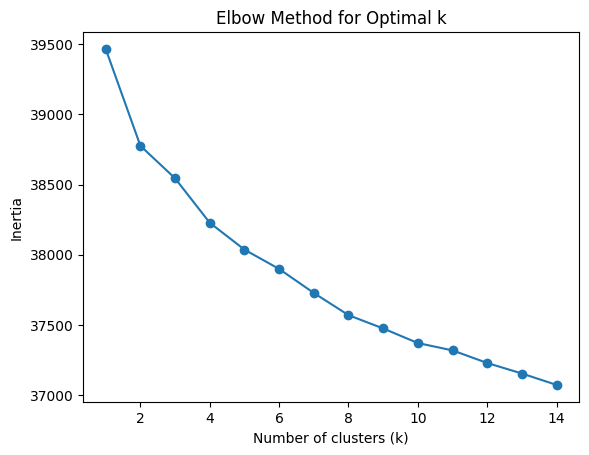

In [ ]:
# K-Means Clustering
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Elbow method visualization
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Apply optimal K-Means
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_normalized)
df['cluster'] = kmeans_final.labels_
silhouette_avg_kmeans = silhouette_score(X_normalized, df['cluster'])
print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans}")

Silhouette Score for K-Means: 0.012083600544486916


In [ ]:
# LDA Topic Modeling
lda_model = LatentDirichletAllocation(n_components=optimal_k, random_state=42)
lda_topics = lda_model.fit_transform(X)
# Print topics
print("Topics from LDA:")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}: ", [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topics from LDA:
Topic 1:  ['daughter', 'act', 'toy', 'watch', 'good', 'play', 'son', 'great', 'love', 'movi']
Topic 2:  ['bought', 'qualiti', 'small', 'littl', 'nice', 'size', 'fit', 'work', 'great', 'use']
Topic 3:  ['sound', 'make', 'like', 'time', 'life', 'work', 'thi', 'stori', 'read', 'book']
Topic 4:  ['cat', 'seri', 'good', 'enjoy', 'love', 'charact', 'dog', 'stori', 'read', 'book']


In [ ]:
# Map topics back to reviews
df['topic'] = lda_topics.argmax(axis=1)

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.9 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pyLDAvis # Upgrade pyLDAvis to the latest version

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize topics using pyLDAvis
import pyLDAvis
import pyLDAvis.lda_model # Use lda_model instead of sklearn

pyLDAvis.enable_notebook()
from scipy.sparse import csr_matrix
X = csr_matrix(X)

lda_visualization = pyLDAvis.lda_model.prepare(lda_model, X, tfidf)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
